In [1]:
import sys, os
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

sys.path.insert(1, '../src/')
from stat_lib import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Comparando-se o mesmo grupo duas vezes (pareado)

Vamos supor que temos um grupo de pacientes que vão ser medicados. Medimos um determinado marcador (p.ex. glicemia) antes da medicação e depois da medicação. ** Desenho experimental e cálculo de número amostral (N).

A principal pergunta: - O medicmaento fez efeito

Caso a distribuição do biomarcador seja normal, podemos fazer o teste t-student para comparar os dois grupos.

Glicose no sangue (mg/dl)
  - normal: < 99 mg/dl
  - pré-diabético: [100, 125] mg/dl
  - diabético: > 125 mg/dl

In [2]:
d = sns.load_dataset("tips")
d.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


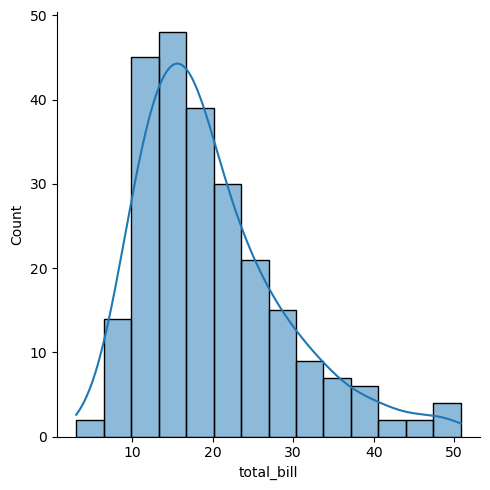

In [3]:
ax = sns.displot(data=d, x = "total_bill", kde=True)

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


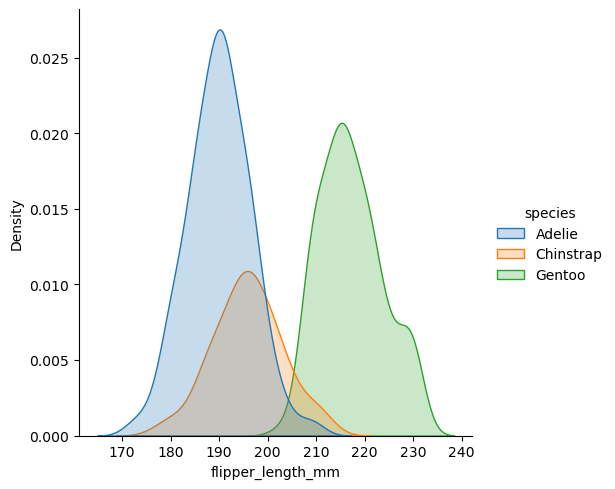

In [5]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True);

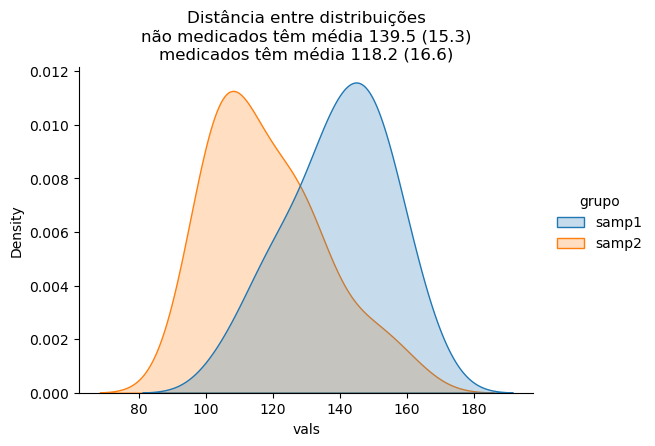

In [6]:
MU1 = 140; SSD1 = 15
MU2 = 110; SSD2 = 25
N   = 30

samp1 = np.random.normal(loc=MU1, scale=SSD1, size=N)
samp2 = np.random.normal(loc=MU2, scale=SSD2, size=N)

mu1 = np.mean(samp1); ssd1 = np.std(samp1)
mu2 = np.mean(samp2); ssd2 = np.std(samp2)

df = join_series(samp1, samp2)

sns.displot(df, x="vals", hue="grupo", kind="kde", fill=True, height=4, aspect=1.4)

title = 'Distância entre distribuições'
title += f'\nnão medicados têm média {mu1:.1f} ({ssd1:.1f})'
title += f'\nmedicados têm média {mu2:.1f} ({ssd2:.1f})'
plt.title(title);

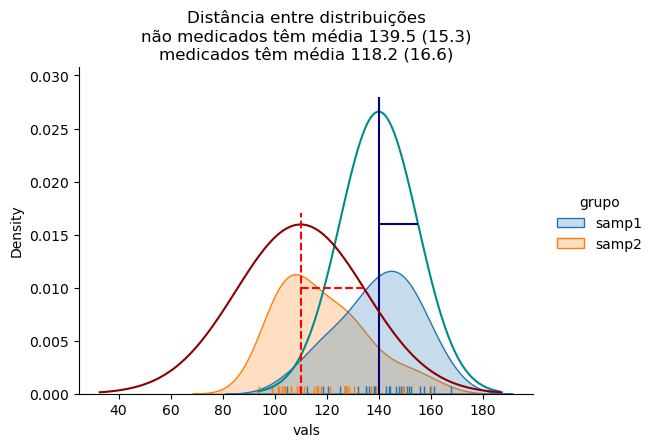

In [7]:
g = sns.displot(df, x="vals", hue="grupo", kind="kde", rug=True, fill=True, height=4, aspect=1.4)
ax = g.ax

#----------- curva em azul
seqx = np.linspace(stats.norm.ppf(0.001, MU1, SSD1), stats.norm.ppf(0.999, MU1, SSD1), 100)
# fiting da curva teorica
normal_pdf = stats.norm.pdf(seqx, MU1, SSD1)
sns.lineplot(x=seqx, y=normal_pdf, color='darkcyan')

ax.vlines(MU1, 0, 0.028, color = 'navy')
ax.hlines(.016, MU1, MU1+SSD1, color = 'navy');

#----------- curva em vermelho
seqx = np.linspace(stats.norm.ppf(0.001, MU2, SSD2), stats.norm.ppf(0.999, MU2, SSD2), 100)
# fiting da curva teorica
normal_pdf = stats.norm.pdf(seqx, MU2, SSD2)
sns.lineplot(x=seqx, y=normal_pdf, color='darkred')

ax.vlines(MU2, 0, 0.017, color = 'red', linestyle='--')
ax.hlines(.010, MU2, MU2+SSD2, color = 'red', linestyle='--')

title = 'Distância entre distribuições'
title += f'\nnão medicados têm média {mu1:.1f} ({ssd1:.1f})'
title += f'\nmedicados têm média {mu2:.1f} ({ssd2:.1f})'
plt.title(title);

### As distribuições são nomais? teste de Shaprio-Wilkis

### Para controle

In [8]:
ret1, text1, text_stat1, stat1, pvalue1 = calc_normalidade_SWT(samp1, 0.05, NS='--')
text1, text_stat1

('Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)',
 'p-value 8.24e-01 (NS)')

### Para tratado

In [9]:
ret2, text2, text_stat2, stat2, pvalue2 = calc_normalidade_SWT(samp2, 0.05, NS='---')
text2, text_stat2

('Segundo o teste de Shapiro-Wilk a distribuição se assemelha a uma distribuição normal (aceita-se H0)',
 'p-value 6.18e-02 (NS)')

### As variâncias iguais?

In [10]:
diff_ssd = np.abs(ssd1 - ssd2)

np.round(ssd1,1), np.round(ssd2,1), np.isclose(ssd1, ssd2), diff_ssd, diff_ssd <= ssd1*0.5

(np.float64(15.3),
 np.float64(16.6),
 np.False_,
 np.float64(1.3184692415060795),
 np.True_)

In [11]:
stats.norm.ppf(0.025, 0, 1)

np.float64(-1.9599639845400545)

In [12]:
stats.norm.ppf(1-0.025, 0, 1)

np.float64(1.959963984540054)

In [13]:
def calc_zs(dof, is_normal=False, confianca=.95):
    
    alpha = (1-confianca)/2
    
    if is_normal:
        # normal distribution
        z_inf = stats.norm.ppf(alpha, 0, 1)
        z_sup = stats.norm.ppf(1-alpha, 0, 1)
    else:
        # t-student distribution
        z_inf = stats.t.ppf( alpha, dof)
        z_sup = stats.t.ppf( (1-alpha), dof)

    return np.array( [z_inf, z_sup])

In [14]:
confianca = 0.95
dof=N-1

zs = calc_zs(dof, confianca=confianca, is_normal=False)
zs

array([-2.04522964,  2.04522964])

In [15]:
zs = calc_zs(dof, confianca=confianca, is_normal=True)
zs

array([-1.95996398,  1.95996398])

In [16]:
np.sqrt(ssd1**2 + ssd2**2)/2

np.float64(11.280762696257383)

In [17]:
diff_list = samp2-samp1
np.mean(diff_list), np.std(diff_list)

(np.float64(-21.30017524239848), np.float64(22.586930426950566))

In [18]:
SEM = np.sqrt(ssd1**2/n1 + ssd2**2/n2)
SEM

NameError: name 'n1' is not defined

In [ ]:
def calc_intervalo_confianca_ant(samp1, samp2, confianca=.95):
    
	n1 = len(samp1); n2 = len(samp2)
	if n1 >= n2:
		N = n1
	else:
		N = n2
	dof = N-1

	# x = np.linspace(stats.t.ppf(0.001, dof), stats.t.ppf(0.999, dof), 100)

	mu1 = np.mean(samp1); ssd1 = np.std(samp1)
	mu2 = np.mean(samp2); ssd2 = np.std(samp2)

	equal_var = np.abs(ssd1 - ssd2) <= ssd1/2
	_, pval_ttest, stri_ttest = calc_ttest_independente(samp1, samp2, equal_var=equal_var)

	diff = mu2 - mu1
	ssd_pool = math.sqrt( ((n1-1)*ssd1**2 + (n2-1)*ssd2**2) / (n1+n2-2) )

	effect_size = diff / ssd_pool

	normalidade1, _, _, _, _ = calc_normalidade_SWT(samp1)
	normalidade2, _, _, _, _ = calc_normalidade_SWT(samp2)

	# is_normal = n1 >= 30 and n2 >= 30 and normalidade1 and normalidade2

	# simulação
	# gammas [-1.96, +1.96]
	# gammas * SEM = [-1.96, +1.96] * 2 --> ~[-4 , 4]
	# IC = diff + gamas * SEM --> 3 + ~[-4 , 4] --> [-1, 7]
	# como não passa pelo zero --> p-value < 0.05
	zs = calc_zs(dof, confianca=confianca, is_normal=False)
	SEM = np.sqrt(ssd1**2/n1 + ssd2**2/n2)
	CI = (zs * SEM) + diff

	return CI, SEM, n1, n2, effect_size, diff, pval_ttest, stri_ttest, mu1, mu2, ssd1, ssd2, ssd_pool

In [ ]:
def calc_intervalo_confianca(samp1, samp2, confianca=.95):
    
    n1, n2 = len(samp1), len(samp2)
    
    mu1 = np.mean(samp1); ssd1 = np.std(samp1, ddof=1)
    mu2 = np.mean(samp2); ssd2 = np.std(samp2, ddof=1)
    
    _, p_lev = stats.levene(samp1, samp2)
    equal_var = p_lev > 0.05
    
    # Welch-Satterthwaite
    dof = (ssd1**2/n1 + ssd2**2/n2)**2 / ( (ssd1**2/n1)**2/(n1-1) + (ssd2**2/n2)**2/(n2-1) )
    
    diff = mu2 - mu1
    SEM = np.sqrt(ssd1**2/n1 + ssd2**2/n2)
    
    ssd_pool = math.sqrt( ((n1-1)*ssd1**2 + (n2-1)*ssd2**2) / (n1+n2-2) )
    effect_size = diff / ssd_pool
    
    alpha = 1 - confianca
    tcrit = stats.t.ppf(1 - alpha/2, dof)
    CI = (diff - tcrit*SEM, diff + tcrit*SEM)
    
    _, pval_ttest, stri_ttest = calc_ttest_independente(samp1, samp2, equal_var=equal_var)
    
    return CI, SEM, n1, n2, effect_size, diff, pval_ttest, stri_ttest, mu1, mu2, ssd1, ssd2, ssd_pool

In [ ]:
confianca=.95

IC, SEM, n1, n2, effect_size, diff, pval_ttest, stri_ttest, mu1, mu2, ssd1, ssd2, ssd_pool = \
calc_intervalo_confianca(samp1, samp2, confianca=confianca)

stri1 = f"IC[inf] = {IC[0]:.2f} e IC[sup] = {IC[1]:.2f}"
stri2 = f"diferença = {diff:.2f} e  SEM = {SEM:.2f} e EF = {effect_size:.2f}"
stri3 = f"ttest: {stri_ttest}"
stri4 = f"N1={n1} e média 1 = {mu1:.2f} ({ssd1:.2f}), N2={n2} e média 2 = {mu2:.2f} ({ssd1:.2f})"

print(stri1)
print(stri2)
print(stri3)
print('\n', stri4)


### Perguntas

  - Porque a diferença deu negativa?
  - Porque o Tamanho de Efeito é menor que a diferença?
  - O que significa os valores do intervalo de confianca?


### Como devo apresentar meus resultados?

In [ ]:
alpha = (1-confianca)/2
unidade = 'mg/dl'

print()
print(f"Pacientes (n={N}) inicialmente apresentaram média de glicemia de {mu1:.2f}({ssd1:.2f}) {unidade}")
print(f"Após tratamento a mesma foi para {mu2:.2f}({ssd2:.2f}) mg/dl.")
print()
print(f"A difença média absoluta foi de {diff:.2f} {unidade}")
print(f"O tamanho do efeito foi de {effect_size:.2f} {unidade} com desvio padrão conjunto de {ssd_pool:.2f}")
print(f"O intervalo de confiança, com um coeficiente de confianca de {confianca*100:.1f}%, foi de [{CI[0]:.2f}, {CI[1]:.2f}] {unidade} com um SEM={SEM:.2f}")
print()

stri = f"Utilizando-se t-test, o p-value calculado foi de {pval_ttest:.2e} o que indica"
if pval_ttest < 0.05:
    print(f"{stri} que houve um efeito positivo do medicamento.")
else:
    print(f"{stri} que não houve efeito positivo do medicamento.")
print()

if effect_size < 0:
    print("apresentando uma diminuição na glicemia pós-tratamento")
else:
    print("não apresentando qualquer diminuição na glicemia pós-tratamento")


In [ ]:
diff_samp = samp2 - samp1

mu = np.mean(diff_samp)
ssd = np.std(diff_samp)

In [ ]:
ssd, ssd_pool

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.histplot(diff_samp, stat='density', color='navy', alpha=0.3, label='diff', ax=ax, zorder=1)
sns.rugplot(diff_samp, color='blue', alpha=0.4, ax=ax, zorder=2)

seqx = np.linspace(  diff - 5*SEM,  diff + 5*SEM, 100)

# fiting da curva teorica pdf da t
t_vals = (seqx - diff)/SEM
pdf = stats.t.pdf(t_vals, dof) / SEM

# área do IC
plt.fill_between(
    seqx, pdf,
    where=(seqx >= IC[0]) & (seqx <= IC[1]),
    alpha=0.3,
    label=f"IC com nível conf = {100*confianca:.0f}%", zorder=3
)

sns.lineplot(x=seqx, y=pdf, color='darkred', zorder=5)

posi_y = [ 0.01, 0.01 ]
posi_x = [ IC[0], IC[1] ]
ax.plot(posi_x, posi_y, color='green', zorder=6)

# linhas verticais
ax.axvline(diff, color="black", linestyle="--", label="Diferença média")
ax.axvline(0, color="red", linestyle=":", label="Diferença = 0")

title = f"O intervalo de confiança (nível={confianca*100:.1f}%) com {n1} pacientes antes and {n2} depois\n[{CI[0]:.2f}, {CI[1]:.2f}] {unidade} com um SEM={SEM:.2f}"

plt.xlabel("Diferença de médias (mu₂ − mu₁)")
plt.ylabel("Densidade")

plt.grid()
ax.legend()
plt.tight_layout()
ax.set_title(title);

### Qual o erro conceitual?

### Exercício:

  - Crie 2 grupos
    - 30 homens
    - 30 mulheres
    
  - Simule as glicemias e os resultados dos tratamentos
  - Compare homens x mulheres:
    - Antes do tratamento
    - Depois do tratamento
  - Compare todos os pacientes:
    - Antes x Depois do tratamento
  - Compare somente mulheres (depois somente homens):
    - Antes x Depois do tratamento
  - Análise seus resultados
  - Descreva seus resultados
 
 
#### Pergunta:

  - O que fizemos de diferente com relação ao estudo anterior?
    - a diferença é MÚLTIPLAS COMPARAÇÕES
  - Posso comparar todos os pacientes antes e depois do tratamento? - independente de sexo (gênero)
    - Responder: **desafio**  

### Veja py05a - 01 - teste de hipótese.ipynb